In [1]:
import pandas as pd

# Cargar el archivo en un DataFrame de pandas
file_path = 'ensadul2021_Int_antro_union.csv'
ensadul2021 = pd.read_csv(file_path, sep=';',low_memory=False)

# Mostrar las primeras filas del DataFrame para verificar su contenido
ensadul2021.head()


,Folio,Folio de integrante,Maquina,Hora de Inicio 1,Fecha de Inicio 1,Hora termino 1,Fecha termino 1,Duración de la Entrevista 1,Resultado de entrevista 1,Hora de Inicio 2,...,ANTRO_Duración de la Entrevista,ANTRO_Hora de termino,ANTRO_Fecha de Termino,ANTRO_Resultado de Entrevista,ANTRO_Especifique otro resultado de entrevista,ANTRO_Ponderador,ANTRO_Estrato urbanidad/ruralidad,ANTRO_ Estrato de seleccion,ANTRO_Region,coincidencia_Antro
0,2021_01001017,2021_01001017_01,MQ049,12:19:32,08/10/2021,12:50:41,08/10/2021,31,1,,...,4.0,20:53:07,11/11/2021,ENTREVISTA COMPLETA,,"3237,09213109962",Metropolitano (100mil y + Hab),13.0,Resto Centro Norte,True
1,2021_01001017,2021_01001017_03,MQ049,17:29:26,08/10/2021,17:38:17,08/10/2021,9,1,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,2021_01001019,2021_01001019_02,MQ049,14:03:58,09/10/2021,14:26:28,09/10/2021,23,1,,...,4.0,21:01:44,11/11/2021,ENTREVISTA COMPLETA,,"5625,65156648308",Metropolitano (100mil y + Hab),13.0,Resto Centro Norte,True
3,2021_01001019,2021_01001019_03,MQ049,12:46:11,07/10/2021,13:06:14,07/10/2021,20,1,,...,4.0,21:05:14,11/11/2021,ENTREVISTA COMPLETA,,"6184,34130293928",Metropolitano (100mil y + Hab),13.0,Resto Centro Norte,True
4,2021_01001021,2021_01001021_02,MQ211,19:23:12,07/10/2021,19:49:18,07/10/2021,26,1,,...,3.0,21:10:22,11/11/2021,ENTREVISTA COMPLETA,,"5364,35155307092",Metropolitano (100mil y + Hab),13.0,Resto Centro Norte,True


In [2]:
columnas = ensadul2021.columns
columnas_edad = [col for col in columnas if 'Edad' in col]
columnas_sexo = [col for col in columnas if 'SEXO' in col or 'sexo' in col]

columnas_edad, columnas_sexo

(['Edad del Seleccionado',
  'Otras Vacunas 1 Edad',
  'Otras Vacunas 2 Edad',
  'Otras Vacunas 3 Edad',
  'Otras Vacunas 1 Edad.1',
  'Otras Vacunas 2 Edad.1',
  'Otras Vacunas 3 Edad.1',
  'INT_Edad',
  'ANTRO_Edad'],
 ['ASEXO ¿Cuál es el sexo de (NOMBRE) ?'])

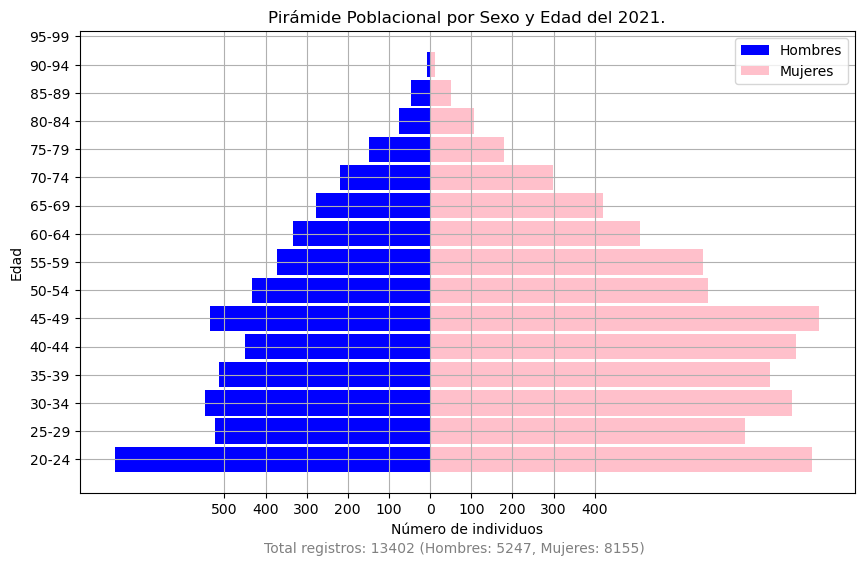

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una pirámide poblacional usando "Edad del Seleccionado" y "ASEXO ¿Cuál es el sexo de (NOMBRE) ?"

columna_edad = 'Edad del Seleccionado'
columna_sexo = 'ASEXO ¿Cuál es el sexo de (NOMBRE) ?'

# Obtener los datos del DataFrame
edad = ensadul2021[columna_edad]
sexo = ensadul2021[columna_sexo]

# Calcular totales
total_registros = len(edad)
total_hombres = (sexo == 'Hombre').sum()
total_mujeres = (sexo == 'Mujer').sum()

# Preparación de los datos
edad = ensadul2021[columna_edad]
sexo = ensadul2021[columna_sexo]
bins = list(range(20, 100, 5))  # Agrupar edades en intervalos de 5 años

# Crear histogramas para hombres y mujeres
histograma_hombres = edad[sexo == 'Hombre'].value_counts(bins=bins, sort=False)
histograma_mujeres = edad[sexo == 'Mujer'].value_counts(bins=bins, sort=False)

# Crear la gráfica de pirámide poblacional
plt.figure(figsize=(10, 6))

# Hombres
plt.barh(bins[:-1], -histograma_hombres.values, height=4.5, color='blue', label='Hombres')

# Mujeres
plt.barh(bins[:-1], histograma_mujeres.values, height=4.5, color='pink', label='Mujeres')

plt.xlabel('Número de individuos')
plt.ylabel('Edad')
plt.title('Pirámide Poblacional por Sexo y Edad del 2021.')
plt.yticks(bins, [f'{i}-{i+4}' for i in bins])
plt.xticks(range(-500, 500, 100), [str(abs(x)) for x in range(-500, 500, 100)])  # Ajustar las etiquetas del eje X
plt.legend()
plt.grid(True)



# Añadir pie de grafico con conteo de registros
plt.figtext(0.5, 0.01, f'Total registros: {total_registros} (Hombres: {total_hombres}, Mujeres: {total_mujeres})', 
            ha='center', fontsize=10, color='gray')

# Mostrar la gráfica
plt.show()


In [4]:
# para el análisis de la altura 
# Nombre de la columna de altura
altura_col = 'ANTRO_4. AHORA VOY A MEDIR LA ESTATURA DE (NOMBRE) (PRIMERA MEDICIÓN)'


# Crear una tabla de frecuencia de altura por su valor original (antes de la conversión a numérico)

# Usando el valor original de la columna de altura
frecuencia_altura_original = ensadul2021[altura_col].value_counts().sort_index()

# Mostrar la tabla de frecuencia
frecuencia_altura_original
# Mostramos solo las primeras 10 entradas para revisión




         1993
107         1
109,9       1
111         1
123,3       1
         ... 
189,7       2
190         1
191,3       1
192         1
222,2      54
Name: ANTRO_4. AHORA VOY A MEDIR LA ESTATURA DE (NOMBRE) (PRIMERA MEDICIÓN), Length: 481, dtype: int64

In [5]:
#estadisticos de la altura
columna_edad = 'Edad del Seleccionado'

# Obtener los datos del DataFrame
edad = ensadul2021[columna_edad]


# Calcular totales altura
total_registros = len(edad)

descripcion_altura = ensadul2021[altura_col].describe()

# Contar la cantidad de valores NaN después de la conversión ajustada
nan_counteo_altura = ensadul2021[altura_col].isna().sum()

descripcion_altura, nan_counteo_altura, total_registros


(count     8265
 unique     481
 top           
 freq      1993
 Name: ANTRO_4. AHORA VOY A MEDIR LA ESTATURA DE (NOMBRE) (PRIMERA MEDICIÓN), dtype: object,
 5137,
 13402)

In [6]:
#estadisticos del peso
columna_edad = 'Edad del Seleccionado'
peso_col = '¿Cuál es su peso habitual sin ropa y zapatos?'

# Obtener los datos del DataFrame
edad = ensadul2021[peso_col]


# Calcular totales altura
total_registros = len(edad)

descripcion_peso = ensadul2021[peso_col].describe()

# Contar la cantidad de valores NaN después de la conversión ajustada
nan_counteo_peso = ensadul2021[peso_col].isna().sum()

descripcion_peso, nan_counteo_peso, total_registros


(count     13402
 unique      116
 top         999
 freq       1209
 Name: ¿Cuál es su peso habitual sin ropa y zapatos?, dtype: object,
 0,
 13402)

In [7]:
# Si el formato de los datos de altura es ###,## (con coma como separador decimal)
# hay que realizar algunas transformaciones

def convertir_altura(valor):
    try:
        # Intentar convertir directamente
        return pd.to_numeric(valor)
    except:
        try:
            # Intentar reemplazar la coma y luego convertir
            return pd.to_numeric(valor.replace(',', '.'))
        except:
            # En caso de error, devolver NaN
            return pd.NA

# Aplicar la función de conversión a cada valor en la columna de altura
ensadul2021['ALTURA_NUM'] = ensadul2021[altura_col].apply(convertir_altura)

# Comprobar los resultados después de la conversión
print(ensadul2021['ALTURA_NUM'])


0         <NA>
1          NaN
2        160.2
3        171.5
4        164.3
         ...  
13397      155
13398    155.5
13399      NaN
13400      NaN
13401      145
Name: ALTURA_NUM, Length: 13402, dtype: object


In [8]:
total_registros = len(edad)
# Obtener una descripción estadística de la columna de altura ajustada
descripcion_altura_ajustada = ensadul2021['ALTURA_NUM'].describe()

# Contar la cantidad de valores NaN después de la conversión ajustada
nan_count_ajustada = ensadul2021['ALTURA_NUM'].isna().sum()

descripcion_altura_ajustada, nan_count_ajustada, total_registros



(count     6272.0
 unique     480.0
 top        154.0
 freq        64.0
 Name: ALTURA_NUM, dtype: float64,
 7130,
 13402)

In [9]:

# Filtrar los valores fuera del rango aceptable (100 - 290 cm)
ensadul2021 = ensadul2021[(ensadul2021['ALTURA_NUM'] >= 100.0) & (ensadul2021['ALTURA_NUM'] <= 250.99)]

# Eliminar las filas donde 'ALTURA_NUM' es NaN en el DataFrame 'ensadul2021', manteniendo todos los demás atributos

# Eliminar filas donde 'ALTURA_NUM' es NaN
ensadul2021_limpio = ensadul2021.dropna(subset=['ALTURA_NUM'])

# Mostrar las primeras filas del DataFrame limpio para confirmar
#ensadul2021_limpio.head()

columna_edad = 'Edad del Seleccionado'

# Obtener los datos del DataFrame
edad = ensadul2021_limpio[columna_edad]


# Calcular totales
total_registros = len(edad)

total_registros



6272

In [10]:
# Para el peso asumimos que el valor esta en  "¿Cuál es su peso habitual sin ropa y zapatos?" 
# Asumimos que el peso es en kilogramos,cualquier peso debajo de 30 kg o arriba de 200 kg sera considerado Outlier
peso_col = '¿Cuál es su peso habitual sin ropa y zapatos?'

# Si el formato de los datos de altura es ###,## (con coma como separador decimal)
# hay que realizar algunas transformaciones

def convertir_peso(valor):
    try:
        # Intentar convertir directamente
        return pd.to_numeric(valor)
    except:
        try:
            # Intentar reemplazar la coma y luego convertir
            return pd.to_numeric(valor.replace(',', '.'))
        except:
            # En caso de error, devolver NaN
            return pd.NA

# Aplicar la función de conversión a cada valor en la columna de peso
ensadul2021_limpio['PESO_NUM'] = ensadul2021_limpio[peso_col].apply(convertir_peso)

# Comprobar los resultados después de la conversión
print(ensadul2021_limpio['PESO_NUM'])






2         64
3         70
4         78
7         72
17        92
        ... 
13387     58
13395     59
13397    999
13398     82
13401    999
Name: PESO_NUM, Length: 6272, dtype: object


In [11]:
 total_registros = len(edad)
# Obtener una descripción estadística de la columna de altura ajustada
descripcion_peso_ajustado = ensadul2021_limpio['PESO_NUM'].describe()

# Contar la cantidad de valores NaN después de la conversión ajustada
nan_count_peso_ajustado = ensadul2021_limpio['PESO_NUM'].isna().sum()

descripcion_peso_ajustado, nan_count_peso_ajustado, total_registros


(count     6271
 unique     102
 top        999
 freq       526
 Name: PESO_NUM, dtype: int64,
 1,
 6272)

In [12]:
# Filtrar los valores fuera del rango aceptable (30 - 200 kg)
ensadul2021_limpio = ensadul2021_limpio[(ensadul2021_limpio['PESO_NUM'] >= 30) & (ensadul2021_limpio['PESO_NUM'] <= 200)]

# Eliminar las filas donde 'PESO_NUM' es NaN en el DataFrame 'ensadul2021', manteniendo todos los demás atributos

# Eliminar filas donde 'PESO_NUM' es NaN
ensadul2021_limpio2 = ensadul2021_limpio.dropna(subset=['PESO_NUM'])

# Mostrar las primeras filas del DataFrame limpio para confirmar
#ensadul2021_limpio.head()

columna_edad = 'Edad del Seleccionado'

# Obtener los datos del DataFrame
edad = ensadul2021_limpio2[columna_edad]


# Calcular totales
total_registros = len(edad)

total_registros

5745

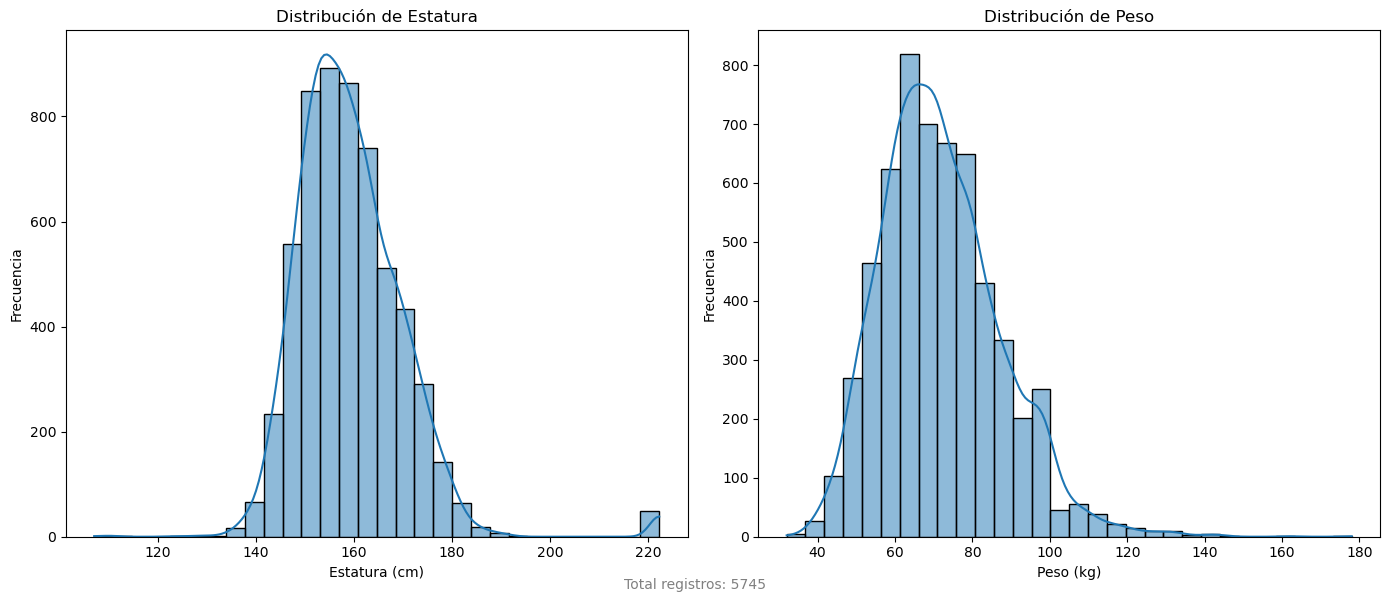

In [13]:
df_altura_limpio = ensadul2021_limpio2['ALTURA_NUM']
df_peso_limpio = ensadul2021_limpio2['PESO_NUM']

# Visualizando los datos limpios de peso y altura
plt.figure(figsize=(14, 6))

# distribución de la altura
plt.subplot(1, 2, 1)
sns.histplot(df_altura_limpio, bins=30, kde=True)
plt.title('Distribución de Estatura')
plt.xlabel('Estatura (cm)')
plt.ylabel('Frecuencia')

# distribución del peso 
plt.subplot(1, 2, 2)
sns.histplot(df_peso_limpio, bins=30, kde=True)
plt.title('Distribución de Peso')
plt.xlabel('Peso (kg)')
plt.ylabel('Frecuencia')

plt.tight_layout()

total_registros = len(edad)

# Añadir pie de grafico con conteo de registros
plt.figtext(0.5, 0.01, f'Total registros: {total_registros}', 
            ha='center', fontsize=10, color='gray')

plt.show()


In [14]:
# Calculando IMC
# Primero, convertir la altura de cm a metros para el cálculo del IMC
altura_metros = ensadul2021_limpio2['ALTURA_NUM'] / 100

# Suponiendo que 'Peso' es el nombre de la columna de peso en el DataFrame
peso = ensadul2021_limpio2['PESO_NUM']

# Calcular el IMC
ensadul2021_limpio2['IMC'] = peso / (altura_metros ** 2)

# Eliminar filas donde el IMC es NaN (si es necesario)
#ensadul2021_limpio.dropna(subset=['IMC'], inplace=True)

# Mostrar las primeras filas para confirmar los cambios
ensadul2021_limpio2.head()



,Folio,Folio de integrante,Maquina,Hora de Inicio 1,Fecha de Inicio 1,Hora termino 1,Fecha termino 1,Duración de la Entrevista 1,Resultado de entrevista 1,Hora de Inicio 2,...,ANTRO_Resultado de Entrevista,ANTRO_Especifique otro resultado de entrevista,ANTRO_Ponderador,ANTRO_Estrato urbanidad/ruralidad,ANTRO_ Estrato de seleccion,ANTRO_Region,coincidencia_Antro,ALTURA_NUM,PESO_NUM,IMC
2,2021_01001019,2021_01001019_02,MQ049,14:03:58,09/10/2021,14:26:28,09/10/2021,23,1,,...,ENTREVISTA COMPLETA,,"5625,65156648308",Metropolitano (100mil y + Hab),13.0,Resto Centro Norte,True,160.2,64,24.937617
3,2021_01001019,2021_01001019_03,MQ049,12:46:11,07/10/2021,13:06:14,07/10/2021,20,1,,...,ENTREVISTA COMPLETA,,"6184,34130293928",Metropolitano (100mil y + Hab),13.0,Resto Centro Norte,True,171.5,70,23.799607
4,2021_01001021,2021_01001021_02,MQ211,19:23:12,07/10/2021,19:49:18,07/10/2021,26,1,,...,ENTREVISTA COMPLETA,,"5364,35155307092",Metropolitano (100mil y + Hab),13.0,Resto Centro Norte,True,164.3,78,28.894786
7,2021_01001031,2021_01001031_04,MQ084,17:07:35,07/10/2021,17:16:12,07/10/2021,9,1,,...,ENTREVISTA COMPLETA,,"20268,2489388306",Metropolitano (100mil y + Hab),13.0,Resto Centro Norte,True,159.7,72,28.230766
17,2021_01001105,2021_01001105_03,MQ084,20:09:00,15/10/2021,20:19:23,15/10/2021,10,1,,...,ENTREVISTA COMPLETA,,"3941,72954628305",Metropolitano (100mil y + Hab),13.0,Resto Centro Norte,True,163,92,34.626821


In [15]:
# validamos NaN en IMC
columna_edad = 'Edad del Seleccionado'

# Obtener los datos del DataFrame
edad = ensadul2021_limpio2[columna_edad]

# Calcular totales
total_registros = len(edad)

# Obtener una descripción estadística de la columna de IMC
descripcion_peso_ajustado = ensadul2021_limpio2['IMC'].astype(float).describe()

# Contar la cantidad de valores NaN después del calculo
nan_count_peso_ajustado = ensadul2021_limpio2['IMC'].isna().sum()

descripcion_peso_ajustado, nan_count_peso_ajustado, total_registros

(count    5745.000000
 mean       28.410006
 std         5.684326
 min         8.506701
 25%        24.586536
 50%        27.852008
 75%        31.609313
 max        82.795096
 Name: IMC, dtype: float64,
 0,
 5745)

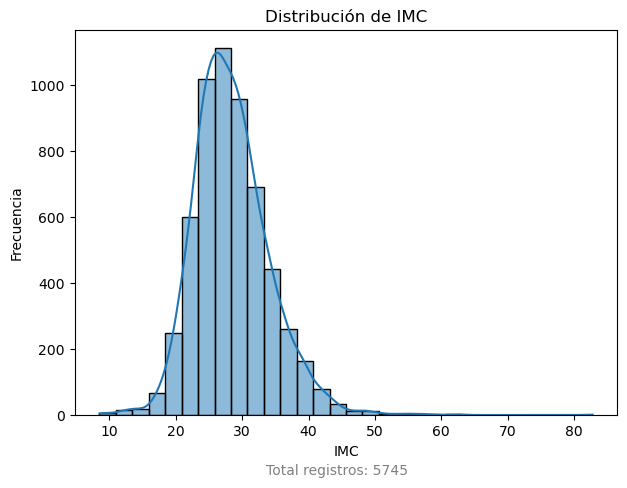

In [16]:
# Análisis de la distribución del IMC
df_IMC = ensadul2021_limpio2['IMC']

# visualización de la distribución
plt.figure(figsize=(7, 5))
sns.histplot(df_IMC, bins=30, kde=True)
plt.title('Distribución de IMC')
plt.xlabel('IMC')
plt.ylabel('Frecuencia')


total_registros = len(edad)

# Añadir pie de grafico con conteo de registros
plt.figtext(0.5, -0.01, f'Total registros: {total_registros}', 
            ha='center', fontsize=10, color='gray')

plt.show()

In [17]:
# Guardando el dataset con nuevos encabezados en un archivo CSV
ensadul2021_limpio2.to_csv('ensadul2021_Limpio.csv',sep=';', index=False)

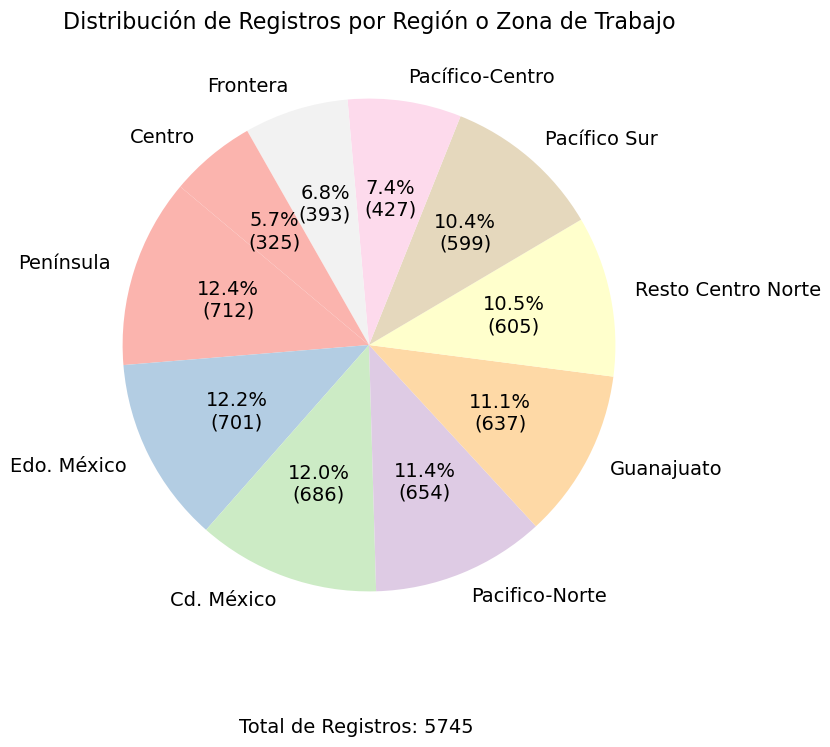

In [18]:
# preparando datos para grafica de pie por region
conteo_x_region = ensadul2021_limpio2['Region'].value_counts()
etiquetas = conteo_x_region.index
tamaño = conteo_x_region.values
total = tamaño.sum()

# paleta de colores
colores = plt.cm.Pastel1.colors

# creando el pie
plt.figure(figsize=(10, 8))
plt.pie(tamaño, labels=etiquetas, colors=colores, autopct=lambda p: '{:.1f}%\n({:d})'.format(p, int(p * total / 100)),
        startangle=140, textprops={'fontsize': 14, 'color': 'black'})

# titulo y pie de imagen
plt.title('Distribución de Registros por Región o Zona de Trabajo', fontsize=16)
plt.figtext(0.5, 0.01, f'Total de Registros: {total}', ha='center', fontsize=14)

plt.show()
